<h1>Preprocessament dades</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


data = pd.read_csv('Publicacions Facebook Thailandia.csv')

data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
#busca agrupar aquestes publicacions en clústers de manera que les publicacions dins del mateix clúster siguin similars en 
#termes de les reaccions dels usuaris.
#En resum, s'aplica K-Means a aquestes columnes específiques perquè l'anàlisi se centra a trobar grups de publicacions similars
#basades en les reaccions dels usuaris.

selected_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
selected_data = data[selected_columns]

selected_data = selected_data.copy()

# Elimanr files buides
selected_data.dropna(inplace=True)

selected_data.head(60)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0
5,217,6,0,211,5,1,0,0,0
6,503,614,72,418,70,10,2,0,3
7,295,453,53,260,32,1,1,0,1
8,203,1,0,198,5,0,0,0,0
9,170,9,1,167,3,0,0,0,0


<h1>Exercici 1</h1>

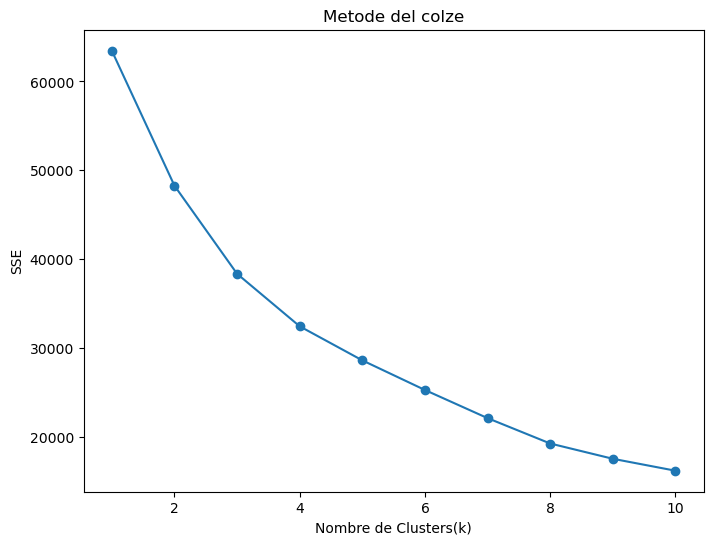

In [3]:

# Normalitzar les dades

scaler = StandardScaler()
normalized_data = scaler.fit_transform(selected_data)

# Métode del Colçe per escollir el nombre óptim de clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Metode del colze')
plt.xlabel('Nombre de Clusters(k)')
plt.ylabel('SSE')
plt.show()


In [4]:
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(normalized_data)

#Agregar etiqueta clúster a les dades originals

selected_data['cluster_label'] = kmeans.labels_


selected_data.to_csv('dades_preprocesades_i_clusteritzades.csv', index=False)

<Figure size 800x600 with 0 Axes>

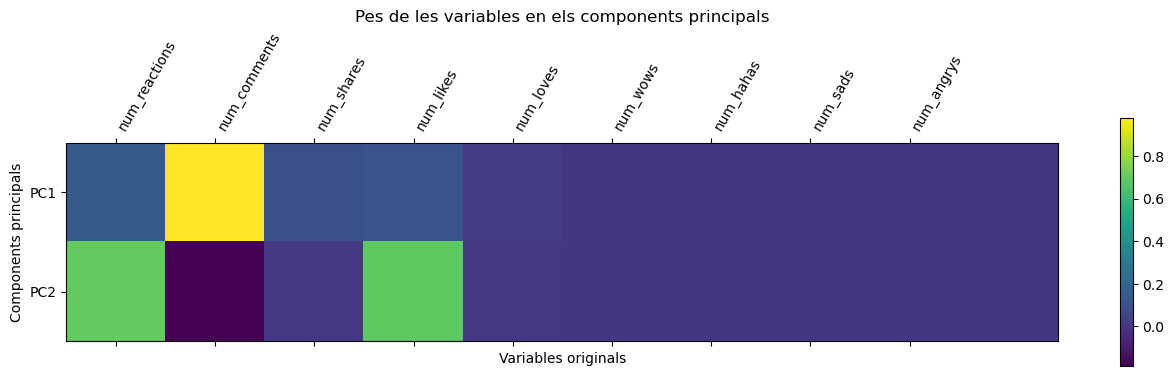

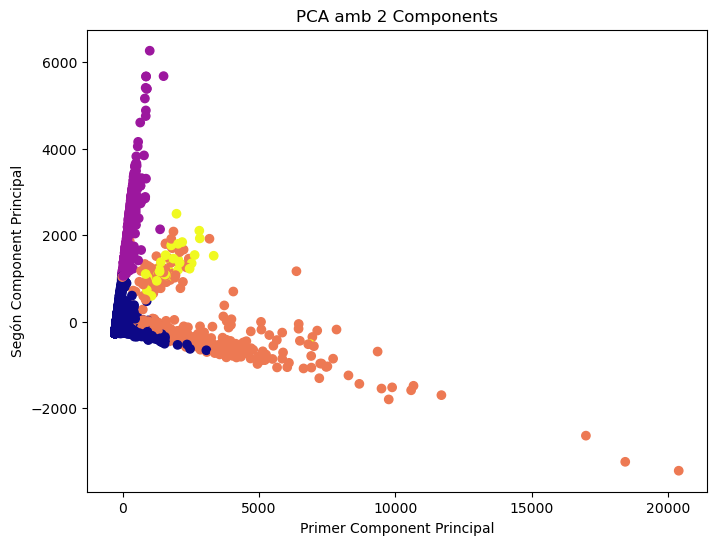

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv('dades_preprocesades_i_clusteritzades.csv')


# Crear un objecte PCA amb dos components principals (n_components=2). Això significa que el
#PCA calcula les dues components principals que expliquen més variància del conjunt de dades original

pca = PCA(n_components=2)

# Crear un nou dataframe anomenat df_pca amb les dues components principals com a columnes (PC1 i PC2)
#i els valors corresponents per a cada fila del dataframe original.
df_pca = pd.DataFrame(pca.fit_transform(df), columns=["PC1", "PC2"])

# Afegir la columna cluster
df_pca["cluster"] = df["cluster_label"]

plt.figure(figsize=(8,6))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['PC1', 'PC2'])
plt.colorbar()
plt.xticks(range(len(selected_columns)), selected_columns, rotation=60, ha='left')
plt.xlabel('Variables originals')
plt.ylabel('Components principals')
plt.title('Pes de les variables en els components principals')
plt.show()


plt.figure(figsize=(8,6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["cluster"], cmap="plasma")
plt.xlabel("Primer Component Principal")
plt.ylabel("Segón Component Principal")
plt.title("PCA amb 2 Components")
plt.show()



In [6]:
#Hi ha quatre grups de publicacions diferents segons les reaccions dels usuaris:
#El grup taronja correspon a publicacions amb moltes reaccions, comentaris i comparticions respecte a la mitjana, i amb una gran
#varietat de tipus de reaccions, com m’encanta, guau, haha, trist o enfadat. Aquest grup podria reflectir publicacions 
#molt interessants i molt emocionals per als usuaris.
#El grup groc correspon a publicacions amb un nombre moderat de reaccions, comentaris i comparticions respecte a la mitjana, i 
#amb una distribució equilibrada de tipus de reaccions. Aquest grup podria reflectir publicacions moderadament interessants i 
#moderadament emocionals per als usuaris.
#El grup blaus fosc correspon a publicacions amb poques reaccions, comentaris i comparticions respecte a la mitjana, i amb una
#distribució equilibrada de tipus de reaccions. Aquest grup podria reflectir publicacions poc interessants o poc emocionals per
#als usuaris.
#El grup porpora correspon a publicacions amb moltes reaccions, comentaris i comparticions respecte a la mitjana,
# Aquest grup podria reflectir publicacions molt interessants per als usuaris.


<h1>Exercici 2</h1>

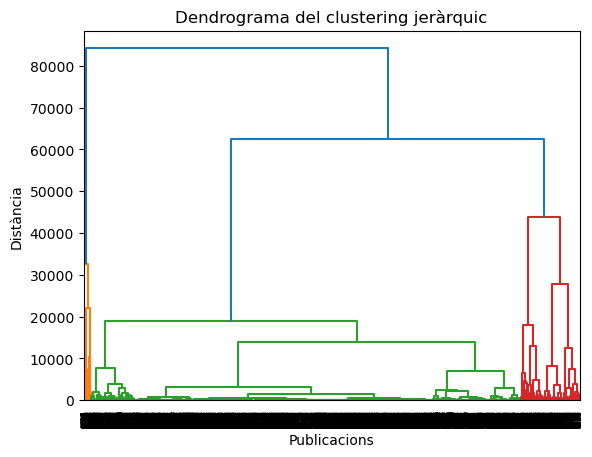

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  cluster_label  cluster  
0          1         1           0              0        2  
1          0         0           0              0        2  
2          1         0           0              0        2  
3          0         0           0              0        2  
4          0         0           0              0        2  


In [19]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Carregar dataset
df = pd.read_csv("datos_preprocesados_y_clusterizados.csv")

# Crear matriu de distàncies
dist = pdist(df, metric="euclidean")

# Crear objecte linkage
Z = linkage(dist, method="ward")

# Després de crear el dendrograma
plt.xticks(fontsize=12, rotation=90) # Canviar la mida de la font a 12 i rotar el text 90 graus
dendrogram(Z)
plt.xlabel("Publicacions")
plt.ylabel("Distància")
plt.title("Dendrograma del clustering jeràrquic")
plt.show()
# Tallar el dendrograma segons el nombre de clusters
k = 4
clusters = fcluster(Z, k, criterion="maxclust")

# Assignar els registres als clusters
df["cluster"] = clusters

# Veure els resultats
print(df.head())



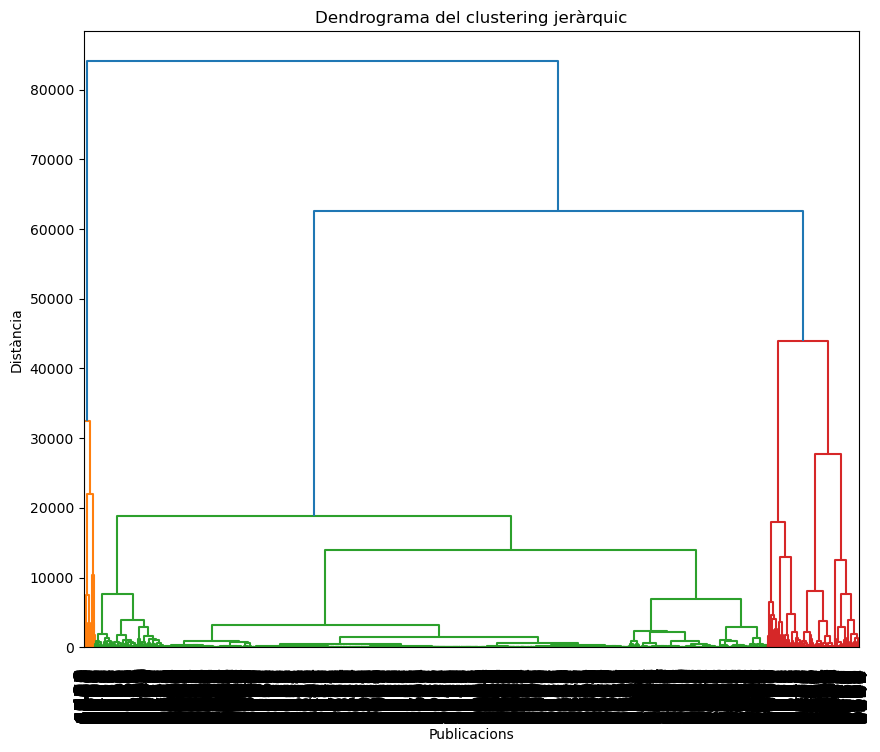

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  cluster_label  cluster  
0          1         1           0              0        2  
1          0         0           0              0        2  
2          1         0           0              0        2  
3          0         0           0              0        2  
4          0         0           0              0        2  


In [24]:
# Importar llibreries
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Carregar dataset
df = pd.read_csv("datos_preprocesados_y_clusterizados.csv")

# Crear matriu de distàncies
dist = pdist(df, metric="euclidean")

# Crear objecte linkage
Z = linkage(dist, method="ward")

# Crear dendrograma
plt.figure(figsize=(10,8))
dendrogram(Z) # Posar aquesta línia abans de plt.show()
plt.tick_params(axis="x", labelsize=16, rotation=90, pad=10)  # Canviar la mida de la font a 12 i rotar el text 90 graus
plt.xlabel("Publicacions")
plt.ylabel("Distància")
plt.title("Dendrograma del clustering jeràrquic")
plt.show() # Posar aquesta línia després de dendrogram(Z)

# Tallar el dendrograma segons el nombre de clusters
k = 4
clusters = fcluster(Z, k, criterion="maxclust")

# Assignar els registres als clusters
df["cluster"] = clusters

# Veure els resultats
print(df.head())


In [ ]:
#l’eix horitzontal, indica els registres, és a dir, les publicacions que he utilitzat per fer el codi. Cada registre té un 
#número que l’identifica.
#l’eix vertical. Aquest eix indica la distància, és a dir, la mesura de la dissimilaritat entre les publicacions. Com més gran 
#és la distància, més diferents són les publicacions.
#La branca vermella té el valor de distància més alt i el nombre de bifurcacions més gran. Això vol dir que aquest clúster és el més 
#heterogeni i el que té més subgrups.
#La branca verda té el valor de distància més baix i el nombre de bifurcacions més petit. Això vol dir que aquest clúster 
#és el més homogeni i el que té menys subgrups.
#La branca blava té un valor de distància intermedi i un nombre de bifurcacions gran. Això vol dir que aquest clúster és 
#moderadament heterogeni i que té molts subgrups petits.


<h1>Exercici 3</h1>

In [9]:
# Importar librería
from sklearn.metrics import silhouette_score


silhouette = silhouette_score(df.drop("cluster", axis=1), df["cluster"])


print(f"Puntuación media de silueta: {silhouette}")


Puntuación media de silueta: 0.7924439098605388
